In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinsons-disease-data-set/parkinsons.data


* import dataset
* describe it
* find number of miss values
* Split dataset into X,y (status column is label)
* preprocessing on X,y
* Split into train and test (test size = 0.15)
* model it

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('/kaggle/input/parkinsons-disease-data-set/parkinsons.data')
data.head(7)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756


In [10]:
# describe it
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [16]:
# find number of miss values
print(data.isnull().sum())
print('Total Number of Miss values: ',data.isnull().sum().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64
Total Number of Miss values:  0


In [19]:
# Split dataset into X,y (status column is label)
X = data.drop(columns='status')
y = data.status
print(data.shape, X.shape, y.shape)

(195, 24) (195, 23) (195,)


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y.shape)

(195,)


In [24]:
X.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [27]:
X = X.drop(columns='name')
X.shape

(195, 22)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

SS = StandardScaler()
X_SS = SS.fit_transform(X)

MM = MinMaxScaler()
X_MM = MM.fit_transform(X)

RB = RobustScaler()
X_RB = RB.fit_transform(X)

In [31]:
# Split into train and test (test size = 0.15)
from sklearn.model_selection import train_test_split

X_train_SS, X_test_SS, y_train_SS , y_test_SS = train_test_split(X_SS,y, test_size=0.15)
X_train_MM, X_test_MM, y_train_MM , y_test_MM = train_test_split(X_MM,y, test_size=0.15)
X_train_RB, X_test_RB, y_train_RB , y_test_RB = train_test_split(X_RB,y, test_size=0.15)

Standard Scaler Method
Logistic  :  0.8333333333333334
Standard Scaler Method
KNN  :  0.8666666666666667
Standard Scaler Method
SVM  :  0.9
Standard Scaler Method
DTree  :  0.9
Standard Scaler Method
RForest  :  0.9
Standard Scaler Method
[12:59:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB  :  0.9


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:>

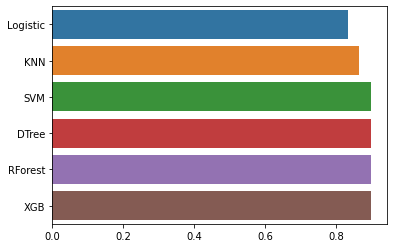

In [36]:
# model it
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from xgboost import XGBClassifier
import seaborn as sns

models = [LogisticRegression(), KNeighborsClassifier(), SVC(), 
          DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()]
names = ['Logistic', 'KNN', 'SVM', 'DTree', 'RForest', 'XGB']

accs = []
for name, model in zip(names, models):
    print("Standard Scaler Method")
    model.fit(X_train_SS, y_train_SS)
    y_pred = model.predict(X_test_SS)
    acc = metrics.accuracy_score(y_test_SS, y_pred)
    print(name , " : ", acc)
    accs.append(acc)
sns.barplot(x= accs, y=names)  

MinMax  Method
Logistic  :  0.9333333333333333
MinMax  Method
KNN  :  0.9333333333333333
MinMax  Method
SVM  :  0.9666666666666667
MinMax  Method
DTree  :  0.8
MinMax  Method
RForest  :  0.9333333333333333
MinMax  Method
[12:59:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB  :  0.9


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:>

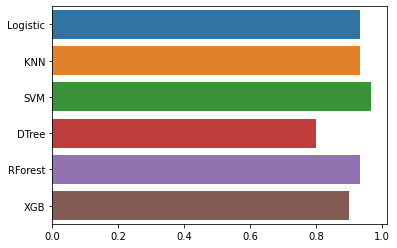

In [37]:
accs = []    
for name, model in zip(names, models):
    print("MinMax  Method")
    model.fit(X_train_MM, y_train_MM)
    y_pred = model.predict(X_test_MM)
    acc = metrics.accuracy_score(y_test_MM, y_pred)
    print(name , " : ", acc)
    accs.append(acc)
sns.barplot(x= accs, y=names)


Robust Scaler Method
Logistic  :  0.6666666666666666
Robust Scaler Method
KNN  :  0.6666666666666666
Robust Scaler Method
SVM  :  0.7666666666666667
Robust Scaler Method
DTree  :  0.6666666666666666
Robust Scaler Method
RForest  :  0.7
Robust Scaler Method
[12:59:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB  :  0.7


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:>

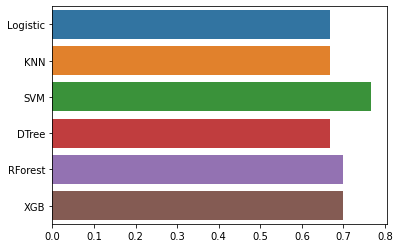

In [38]:
accs = []    
for name, model in zip(names, models):
    print("Robust Scaler Method")
    model.fit(X_train_RB,  y_train_RB)
    y_pred = model.predict(X_test_RB)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(name , " : ", acc)
    accs.append(acc)
sns.barplot(x= accs, y=names) 

# Using Cross validation 


    cross_val_score: calculate score for each CV split
    cross_validate: calculate one or more scores and timings for each CV split

The cross_validate function differs from cross_val_score in two ways:

    It allows specifying multiple metrics for evaluation.

    It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score

Standard Scaler Method
Logistic  :  0.9230769230769231
KNN  :  0.8717948717948718
SVM  :  0.9487179487179487
DTree  :  0.9487179487179487
RForest  :  0.9230769230769231
[13:23:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the 

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder i

<AxesSubplot:>

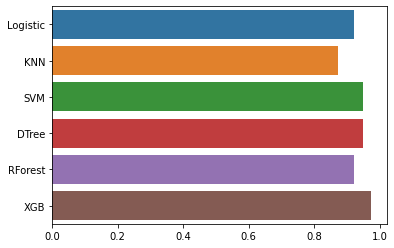

In [47]:
from sklearn.model_selection import cross_validate

accs = []
print("Standard Scaler Method")
for name, model in zip(names, models):
    
    scores = cross_validate(model, X_SS, y, scoring='accuracy')
    print(name , " : ", scores['test_score'].max())
    accs.append(scores['test_score'].max())

sns.barplot(x= accs, y=names) 


MinMAx Method
Logistic  :  0.9743589743589743
KNN  :  0.8974358974358975
SVM  :  0.9487179487179487
DTree  :  0.8717948717948718
RForest  :  0.8717948717948718
[13:24:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default e

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder i

XGB  :  0.9743589743589743


<AxesSubplot:>

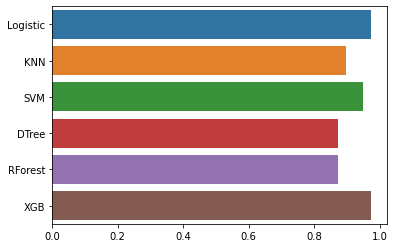

In [48]:
from sklearn.model_selection import cross_validate

accs = []
print("MinMAx Method")
for name, model in zip(names, models):
    
    scores = cross_validate(model, X_MM, y, scoring='accuracy')
    print(name , " : ", scores['test_score'].max())
    accs.append(scores['test_score'].max())

sns.barplot(x= accs, y=names) 

Robust Scaler Method
Logistic  :  0.9487179487179487
KNN  :  0.8717948717948718
SVM  :  0.9743589743589743
DTree  :  0.8717948717948718
RForest  :  0.8717948717948718
[13:24:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder i

XGB  :  0.9743589743589743


<AxesSubplot:>

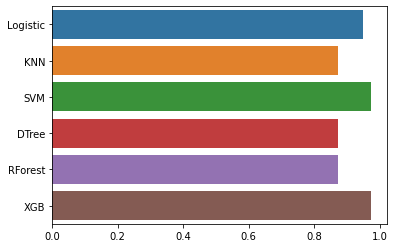

In [49]:
from sklearn.model_selection import cross_validate

accs = []
print("Robust Scaler Method")
for name, model in zip(names, models):
    
    scores = cross_validate(model, X_RB, y, scoring='accuracy')
    print(name , " : ", scores['test_score'].max())
    accs.append(scores['test_score'].max())

sns.barplot(x= accs, y=names) 